In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

def generateCurve(function=np.sin):
    x = np.arange(0, 2 * math.pi, 0.05)
    y = function(x)
    return x, y

def drawFitFigure(N, deg, l=0):
    xp, yp = generatePoints(N)
    xf, yf = generateFit(xp, yp, deg, l)
    if l == 0:
        plt.xlabel('#sample=%d, deg=%d' % (N, deg))
    else:
        plt.xlabel('#sample=%d, deg=%d, ln(l)=%.2f' % (N, deg, math.log(l)))
    red_line, = plt.plot(xf, yf, 'r')
    plt.plot(xp, yp, 'rx')
    return red_line

sampled = {}

def generatePoints(N):
    if N in sampled: return sampled[N]
    x = np.linspace(0, 2 * math.pi, num=N)
    y = np.sin(x) + np.random.normal(scale=0.2, size=N)
    sampled[N] = (x, y)
    return x, y

def generateFit(x, y, deg, l):
    A = np.zeros((len(x), deg + 1))
    for k in range(deg + 1):
        A[:, k] = np.power(x, k)
    At = A.transpose()
    w = np.linalg.inv(At.dot(A) + l * np.identity(deg + 1)).dot(At).dot(y)
    fitFunction = np.poly1d(w[::-1])
    return generateCurve(fitFunction)


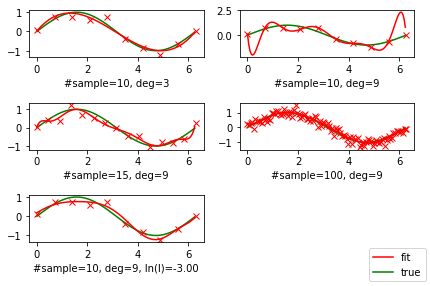

In [3]:
fig = plt.figure()

xc, yc = generateCurve()

plt.subplot(321)
green_line, = plt.plot(xc, yc, 'g')
red_line = drawFitFigure(10, 3)

plt.subplot(322)
plt.plot(xc, yc, 'g')
drawFitFigure(10, 9)

plt.subplot(323)
plt.plot(xc, yc, 'g')
drawFitFigure(15, 9)

plt.subplot(324)
plt.plot(xc, yc, 'g')
drawFitFigure(100, 9)

plt.subplot(325)
plt.plot(xc, yc, 'g')
drawFitFigure(10, 9, l=math.exp(-3))

fig.legend((red_line, green_line), ('fit', 'true'), 'lower right')

plt.tight_layout()

plt.show()